### Importing the necessary libraries

In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [3]:
data = pd.read_csv("CardioGoodFitness.csv")

In [4]:
#copying the data to another varibale to avoid any changes to original data
df=data.copy()

### View the first 10 rows of dataset

In [5]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


**Observations**

* Product contains the model no. of the product.
* Usage contains the no. of times the product is used in a week.
* Fitness contains the fitness level (self-rated) of a person on a scale of 1-5, with 1 being very unfit and 5 being very fit.
* Miles contains the no. of miles a person is expected to run in a week.

### Shape of the Dataset

In [79]:
df.shape

(180, 9)

**Observations**

* This Dataset has 180 rows and 9 columns.

### Dataframe Info

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**

* Product, Gender and MaritalStatus should be categorical variables.

In [82]:
df.isnull().sum() # To findout null values in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
* Found no null values

In [89]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations**
* Found no missing values

### Data Preprocessing

#### Fixing the datatypes

In [85]:
# categorical columns should be converted to categorical type

df['Product'] =df.Product.astype('category')
df['Gender']= df.Gender.astype('category')
df['MaritalStatus']= df.MaritalStatus.astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


* Fixed all the data type columns.

In [87]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations**
* Product has 3 unique categories.
* Gender and MaritalStatus have 2 unique categories each.

###  Univariate Analysis on Numerical Varibales

In [40]:
# Creating a function to use this code block multiples times
def dist_plot(var, bins=None):
    sns.distplot(var) # create a distribution plot
    mean=var.mean() # to calculate the mean 
    median=var.median() # to calculate the median
    plt.axvline(mean, color='r') # to draw a red coloured vertical line on x-axis which represents mean 
    plt.axvline(median, color='g', linestyle='dashed') # to draw a green coloured dashed line on x-axis which represents median

In [36]:
def box_plot(var):
    plt.boxplot(var)

#### Analysis on Age Variable

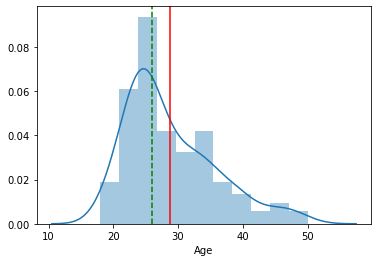

In [41]:
dist_plot(df.Age)

**Observations**

* The distribution of Age is moderately right skewed.
* Most of the customers fall in the 20 to 40 age group.
* Majority of the customers are in the 23 to 28 age group.

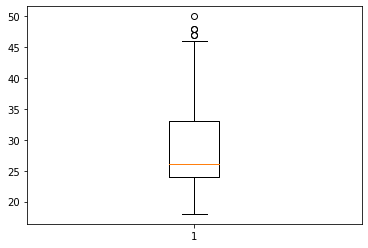

In [231]:
box_plot(df.Age)

**Observations**
* There are some outliers in Age variable.
* Median is close to 25th percentile.

#### Analysis on Educaion Variable

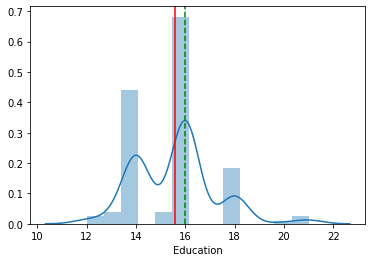

In [42]:
dist_plot(df.Education)

**Observations**

* It has some skewness on right side.
* Majority of the customers have 16 years of education.


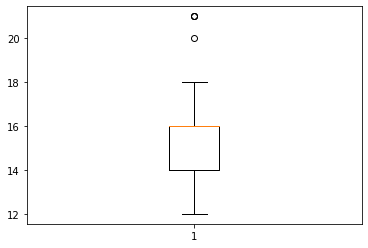

In [34]:
box_plot(df.Education)

**Observations**
* Very few outliers in Education variable.
* Median is at 75th percentile.

#### Analysis on Usage Variable

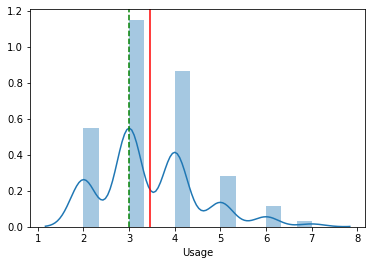

In [43]:
dist_plot(df.Usage)

**Observations**

* Distribution has rightskewness.
* Average expected usage of the product is between 3 and 4 times per week.

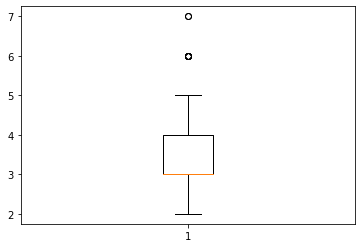

In [233]:
box_plot(df.Usage)

**Observations**

* Very few outliers in Usage variable.
* Median is at 25th percentile.

#### Analysis on Income Variable

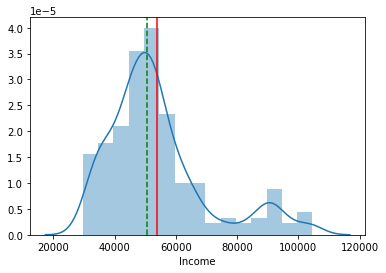

In [189]:
dist_plot(df.Income)

**Observations**

* Income varibale has right skewness.
* Most of the customer income is in the range of 30000 to 60000 Income.

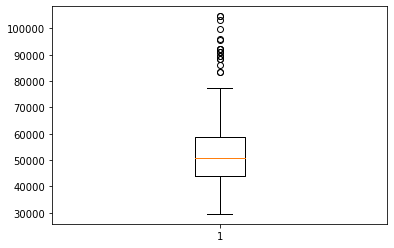

In [234]:
box_plot(df.Income)

**Observations**

* There are many outliers in Income varibale.
* Median is around 50th percentile.

#### Analysis on Fitness Variable

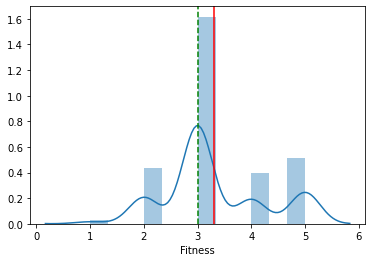

In [190]:
dist_plot(df.Fitness)

**Observations**
* Majority of the customers are at medium fitness level.


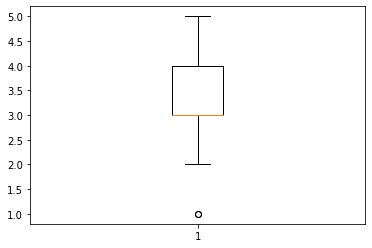

In [235]:
box_plot(df.Fitness)

**Observations**

* Very few outliers towards bottom for the fitness varibale.
* Median is at 25th percentile.

#### Analysis on Miles Variable

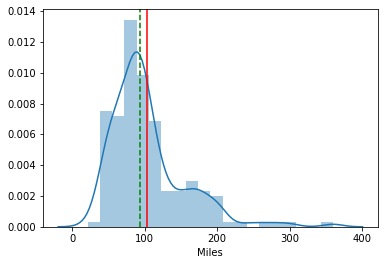

In [191]:
dist_plot(df.Miles)

**Observations**
* Miles variable has right skewness.
* Mean is 103 and median is 94 indicating that majority customers expect to run around 100 miles in week.

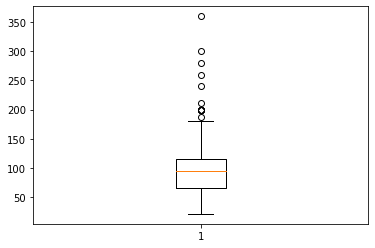

In [236]:
box_plot(df.Miles)

**Observations**

* There are many outliers in Miles varibale.
* Median is slightly close to the 75th percentile.

### Univariate Analysis on Categorical Variables

In [212]:
def count_plot(var):
    sns.countplot(x=var,data=df)

#### Analysis on Product Variable

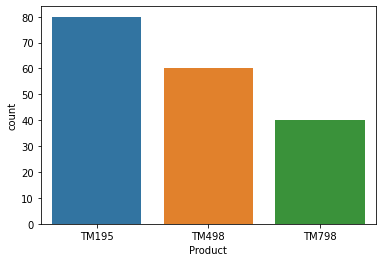

In [214]:
count_plot("Product")

**Observations**
* Majority of the customers have <b>TM195</b>, followed by <b>TM498</b> and <b>TM798</b>.

#### Analysis on Income Variable

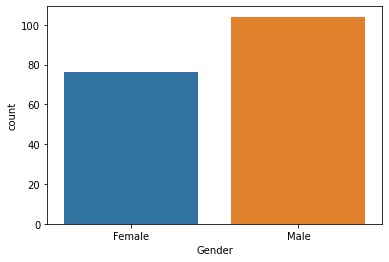

In [216]:
count_plot("Gender")

**Observations**
* Of the total 180 customers, 104 are male and 76 are female.

#### Analysis on MaritalStatus Variable

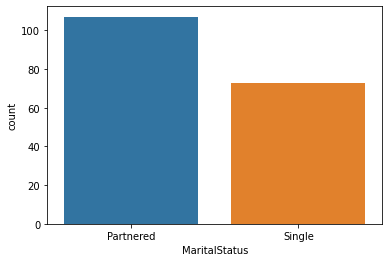

In [217]:
count_plot("MaritalStatus")

**Observations**
* 107 customers are partenered and 73 customers are single.

### Correlation on Age, Education, Income,  Usage, Fitness & Miles

#### Scatterplot

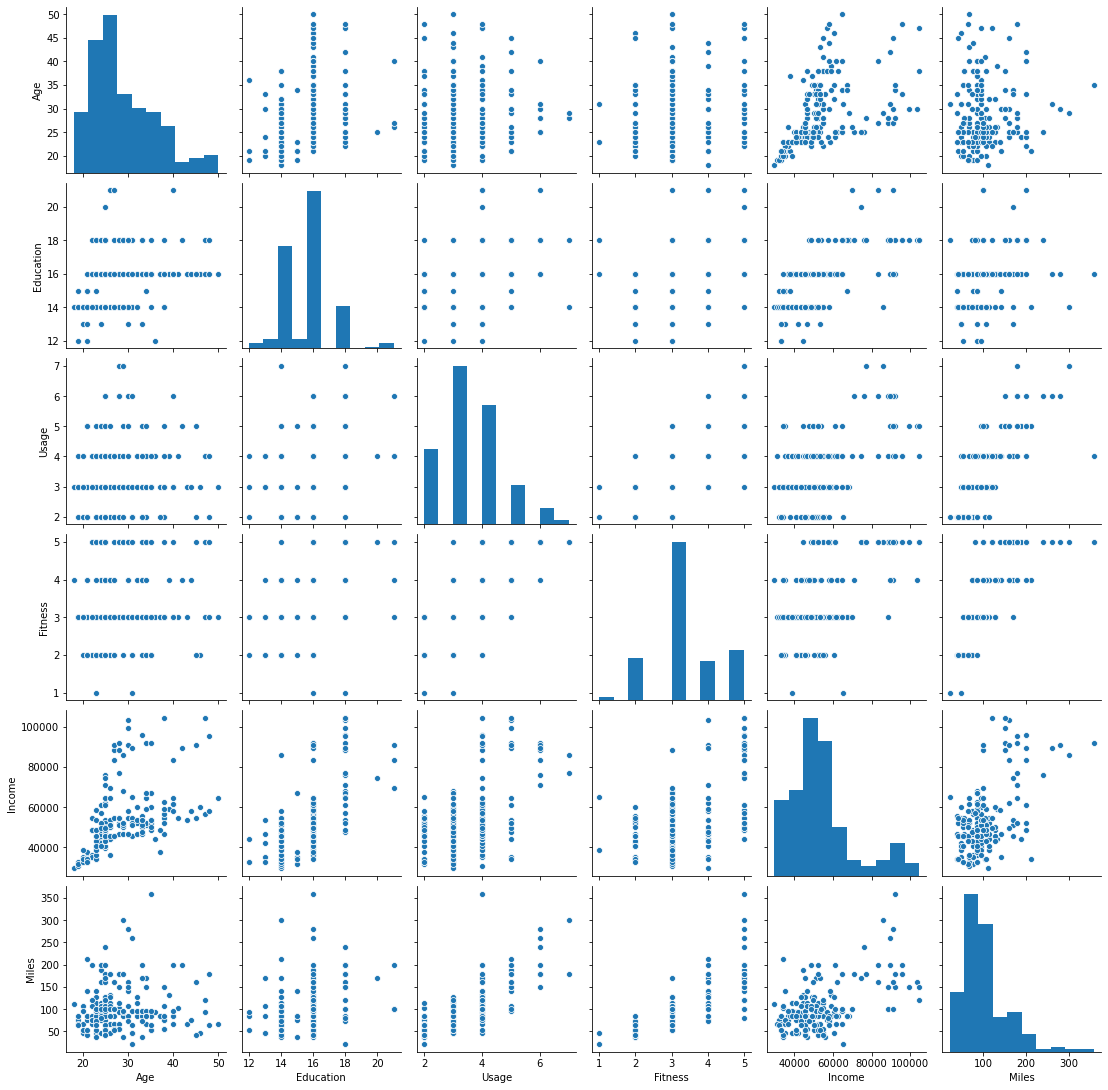

In [258]:
sns.pairplot(df)

#### Variables correlation by HeatMap 

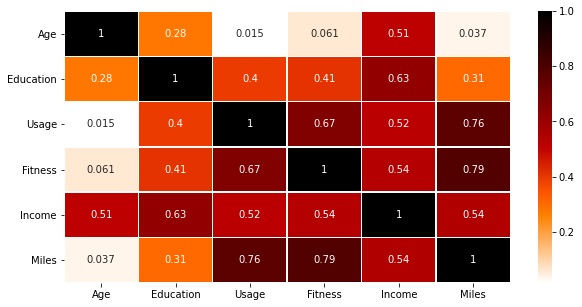

In [139]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=.5,cmap="gist_heat_r")

**Observations**

* As expected, Usage and Miles have good correlation. 
* Fitness has strong correlation with Miles and Usage.
* While education and Income correlate well with each other, Education doesn't have much correlation with other variables.
* Income shows a decent correlation with all variables.
* Age has decent correlation with income and some correlation with Education. Age has no influence on Usage, Fitness, and Miles.

### Multivariate analysis

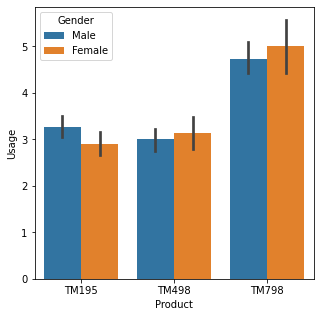

In [28]:
sns.barplot(x="Product", y="Usage", hue="Gender", data=df)

**Observations**

<b> Comparing weekly usage with the product categories: </b>

* <b>TM798</b> is used more often than <b>TM498</b> and <b>TM195</b>. 
* Female customers use <b>TM798</b> and <b>TM498</b> slightly more than male customers.
* Male customers use <b>TM195</b> slightly more than Female customers.

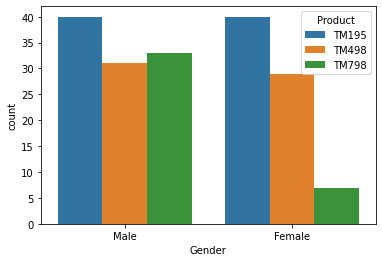

In [44]:
sns.countplot(x="Gender",data=df, hue= "Product" )

**Observations**
* <b>TM798</b> is largely preferred by Male customers, while <b>TM195</b> and <b>TM498</b> are preferred by both male & female customers equally.

In [7]:
bins = [0,40000,70000,105000] #creating bins for Income
labels=['Low Income','Medium Income','High Income'] #Creating labels to assign it to bins

In [8]:
df['Income Category'] = pd.cut(df['Income'],bins,labels=labels)#Creating new column and adding it in to the dataset

In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category
0,TM195,18,Male,14,Single,3,4,29562,112,Low Income
1,TM195,19,Male,15,Single,2,3,31836,75,Low Income
2,TM195,19,Female,14,Partnered,4,3,30699,66,Low Income
3,TM195,19,Male,12,Single,3,3,32973,85,Low Income
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low Income


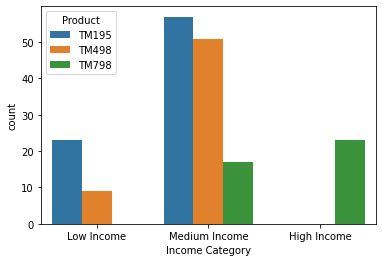

In [18]:
sns.countplot(x="Income Category",data=df, hue= "Product" )

**Observations**

* Majority of the customers are in the medium income range.
* Among the medium income customers, most of them preferred <b>TM195</b> followed by <b>TM498</b>, and only a few customers went for <b>TM798</b>.
* High income customers only preferred <b>TM798</b> indicating that it is a premium product.
* Low income customers only preferred <b>TM195</b> or <b>TM498</b>, with majority of them going with <b>TM195</b>.

In [18]:
bins = [17,30,40,50]#creating bins for Age
labels=['17-30 Age','31-40 Age','41-50 Age'] # Creating labels to assign it to bins

In [19]:
df['Age Category'] = pd.cut(df['Age'],bins,labels=labels)#Creating new column and adding it in to the dataset

In [20]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Category,Age Category
0,TM195,18,Male,14,Single,3,4,29562,112,Low Income,17-30 Age
1,TM195,19,Male,15,Single,2,3,31836,75,Low Income,17-30 Age
2,TM195,19,Female,14,Partnered,4,3,30699,66,Low Income,17-30 Age
3,TM195,19,Male,12,Single,3,3,32973,85,Low Income,17-30 Age
4,TM195,20,Male,13,Partnered,4,2,35247,47,Low Income,17-30 Age


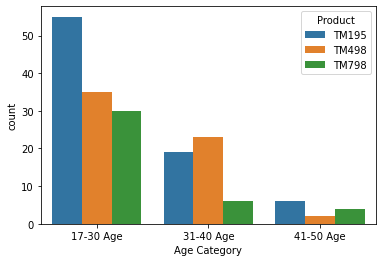

In [33]:
sns.countplot(x="Age Category", data=df, hue="Product")

**Observations**

* Majority of customers are under 30 years of age and most of them preferred <b>TM195</b> followed by <b>TM498</b> and <b>TM798</b>.
* Among 31-40 age group, <b>TM498</b> is the most preferred product followed by <b>TM195</b> and <b>TM798</b>.
* There are very few customers in between 41-50 age group, and they preferred <b>TM195</b> the most followed by <b>TM798</b> and <b>TM498</b>.

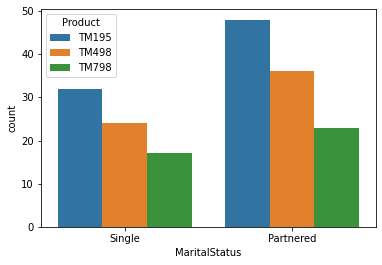

In [26]:
sns.countplot(x="MaritalStatus", data=df, hue="Product")

**Observations**
* There are more partnered customers than single customers.
* Both partnered and single customers preferred <b>TM195</b> the most followed by <b>TM498</b> and <b>TM798</b>.

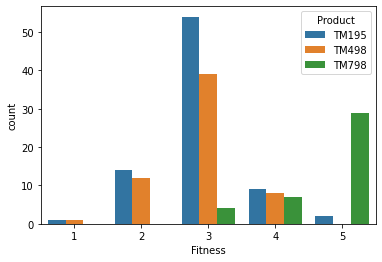

In [43]:
sns.countplot(x="Fitness", data=df, hue="Product")

**Observations**
* Majority of customers who owned <b>TM195</b> and <b>TM498</b> are at fitness level 3.
* Majority of customers who owned <b>TM798</b> are at above fitness level 4 and above.

## Conclusion:

<b>Based on the analysis, we can conclude the following customer characteristics for the different Cardio Good Fitness products:</b>

<b>TM195:</b>
Used by ~44% of the customers
Mainly low-medium income level
Product usage/week is low & customer fitness level is average 

<b>TM498:</b>
Used by ~33% of the customers
Low-medium income level
Product usage/week is low & their customer fitness level is average 

<b>TM798:</b>
Used by ~23% of the customers
High-income customers preferred only TM198, not other two products
Product usage/week is high & customer fitness level is very good

* Majority of Good Cardio Fitness’s customers are under 30 years of age and most of them preferred TM195 followed by TM498 and TM798.

* Among 31-40 age group, TM498 is the most preferred product followed by TM195 and TM798.

* There are very few customers in between 41-50 age group, and they preferred TM195 the most followed by TM798 and TM498.

* TM798 is largely preferred by Male customers, while TM195 and TM498 are preferred by both male & female customers equally.

* There are more partnered customers than single customers.

* Both partnered and single customers preferred TM195 the most followed by TM498 and TM798.

* It is observed that customers who have TM195 & TM498 do not use the product more number of times per week compared to the customer who have TM798, because of which fitness level of TM195 & TM498 customers is average. 


## Recommendations:

* TM195 has the highest demand among the three products sold by Cardio Good Fitness followed by TM498. While TM195 & TM498 share almost similar customer profiles, TM798 is preferred only by high-income customers & a few medium-income customers.

* Cardio Good Fitness must promote TM195 & TM498 products to the low-medium income level customers.

* Cardio Good Fitness must promote TM798 to male high-income level customers.
